## **Predicting the Quarterly Revenue for Alibaba**


In [1]:
# Importing Packages
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import sklearn.preprocessing
from sklearn.metrics import r2_score
import keras

from keras.layers import Dense,Dropout,SimpleRNN,GRU, Bidirectional,LSTM
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
# Reading the Data
df=pd.read_excel('Alibaba Quarterly Revenue.xlsx')
df.head()

,Date,Quarterly Revenue
0,2013-09-30,1777
1,2013-12-31,3061
2,2014-06-30,2542
3,2014-09-30,2742
4,2014-12-31,4219


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               36 non-null     datetime64[ns]
 1   Quarterly Revenue  36 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 704.0 bytes


In [4]:
# Setting Date as Index
df = df.set_index('Date')
df.head()

,Quarterly Revenue
Date,
2013-09-30,1777
2013-12-31,3061
2014-06-30,2542
2014-09-30,2742
2014-12-31,4219


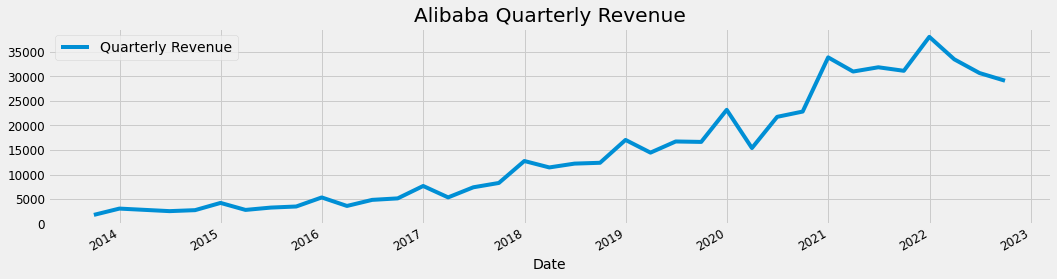

In [5]:
# Plotting the data
df.plot(figsize=(16,4),legend=True)
plt.title('Alibaba Quarterly Revenue')
plt.show()

C:\Users\ravit\AppData\Local\Temp\ipykernel_28024\1521455262.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['Quarterly Revenue']
C:\Users\ravit\AppData\Local\Temp\ipykernel_28024\1521455262.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['Quarterly Revenue']


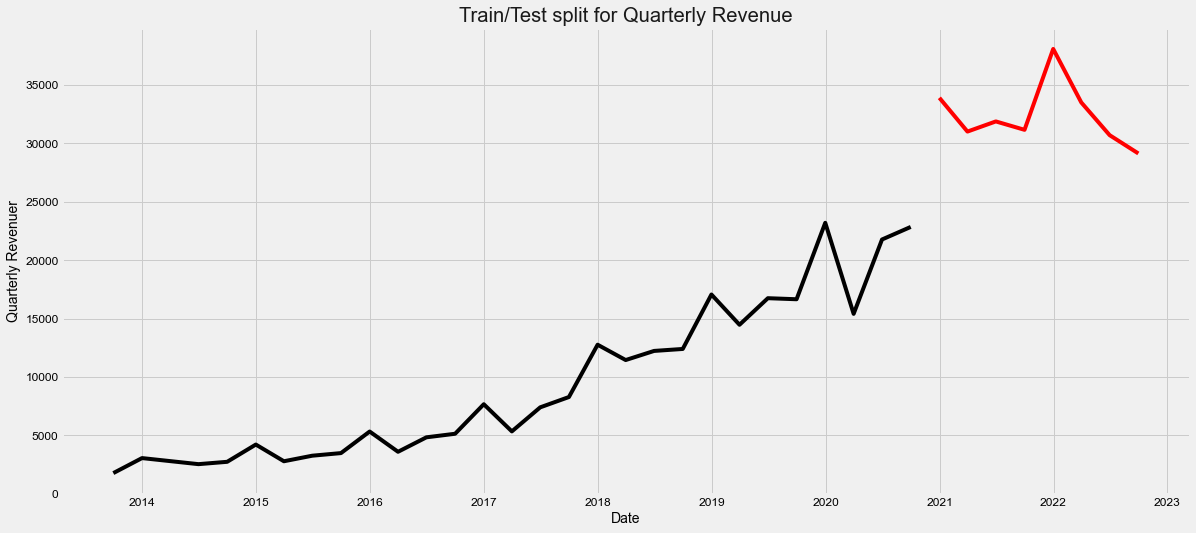

In [8]:
# Dividing the data into training and testing
# Ploting the data
import seaborn as sns 
df['Date'] = df.index
train = df[df['Date'] < pd.to_datetime("2020-12", format='%Y-%m')]
train['train'] = train['Quarterly Revenue']
del train['Date']
del train['Quarterly Revenue']
test = df[df['Date'] >= pd.to_datetime("2020-12", format='%Y-%m')]
del test['Date']
test['test'] = test['Quarterly Revenue']
del test['Quarterly Revenue']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Quarterly Revenue")
plt.ylabel("Quarterly Revenuer")
plt.xlabel('Date')
sns.set()
plt.show()

## **Arima Model**

In [9]:
# Applying ARIMA Model
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=496.559, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=509.779, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=495.750, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=496.533, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=509.765, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=495.450, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=491.068, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=488.303, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=496.118, Time=0.24 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=485.002, Time=0.40 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=486.920, Time=0.42 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=487.007, Time=0.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=487.113, Time=0.33 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=inf, Time

R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


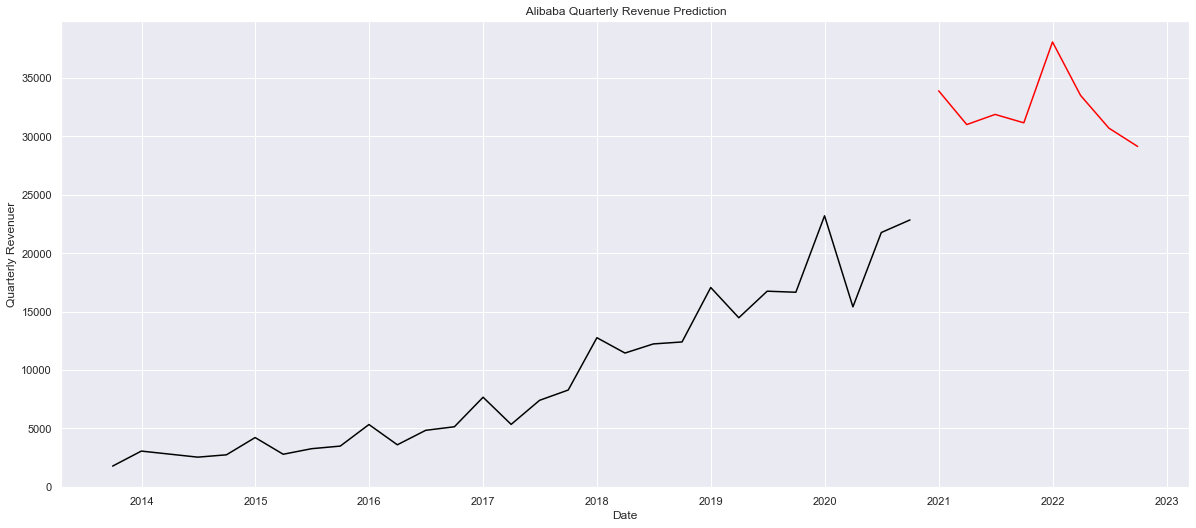

In [10]:
# Plotting the prediction
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(forecast, color = "green")
plt.title(" Alibaba Quarterly Revenue Prediction")
plt.ylabel("Quarterly Revenuer")
plt.xlabel('Date')
sns.set()
plt.show()

## **SARIMA Model**

In [22]:
df=pd.read_excel('Alibaba Quarterly Revenue.xlsx')
df = df.set_index('Date')

In [23]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [24]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1474.5164167195842
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1457.9447016281383
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:952.519637158085


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1988.9090837227723
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1327.931717025625
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1264.9699599153773


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it


SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:930.76558561935


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:957.8083167162843
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1441.369801440922
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1437.613115143722


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it


SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:936.8119338630217


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2118.58705031874
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1435.0107916169118
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1436.7097723040172
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:955.1026527668786


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it


SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:922.5707681395393
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1169.8355519039444
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1156.0806725197706
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:801.5564436043198


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8

SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1161.9790807439947
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1148.1156021948439


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it


SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1140.864875944122


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it


SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:803.0488596160999


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1122.3001802659592
SARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1156.631198848134
SARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1174.77732079022


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it


SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:799.518607039824


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it


SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1498.0255481250638
SARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1139.0402118192644


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it


SARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1131.9056790673587
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:801.4153841911007


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it


SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1655.0325961277194
SARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1198.1680963643992


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python

SARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1160.4855356925232
SARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:926.1257526725503


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8

SARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:2046.016869548066
SARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1085.955487713466


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

SARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1090.7291673626405


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it


SARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:922.7573709828617


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

SARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:967.5738882567148
SARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1168.9239479256132


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it


SARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1140.2353761449392


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it


SARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:1020.8176525267444


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it


SARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1732.814617672619


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it


SARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1089.6507153363896


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it


SARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1114.4405211786705


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it


SARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:44.919201228708346


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

SARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:984.192536792449
SARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1155.5657957427857
SARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1171.0404023065414
SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:798.9176711600961


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1425.9888308697573
SARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1136.3004082267578


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

SARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1130.6326803356385
SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:800.8636332505071


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it


SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1545.9897222361667
SARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1116.1651694464306
SARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1169.4033601829822


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it


SARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:798.1015021141081


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

SARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1545.5754242481846


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it


SARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1113.1551692351472


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it


SARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1113.7364428680771
SARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:800.098274991315


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it


SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1382.6426338208157


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  method=method,


In [26]:
#Fitting the SARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(df, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  # If an index is available, see if it is a date-based index or if it


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5736      0.586     -0.978      0.328      -1.723       0.576
ma.L1          0.4940      0.632      0.781      0.435      -0.745       1.733
ar.S.L12       0.0019      0.164      0.011      0.991      -0.320       0.324
sigma2      6.155e+06   2.96e-08   2.08e+14      0.000    6.15e+06    6.15e+06


In [72]:
prediction = result.get_prediction(start = pd.to_datetime('2021-04-30'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  # Negative indices (that lie in the Index)


,lower Quarterly Revenue,upper Quarterly Revenue
2021-04-30,133299.243434,143023.993307
2021-07-31,138972.339021,148697.088895
2021-10-31,133165.550096,142890.299970
2022-01-31,149300.397194,159025.147067
2022-04-30,133392.899885,143117.649759
2022-07-31,142751.969848,152476.719721
2022-10-31,145428.832134,155153.582008


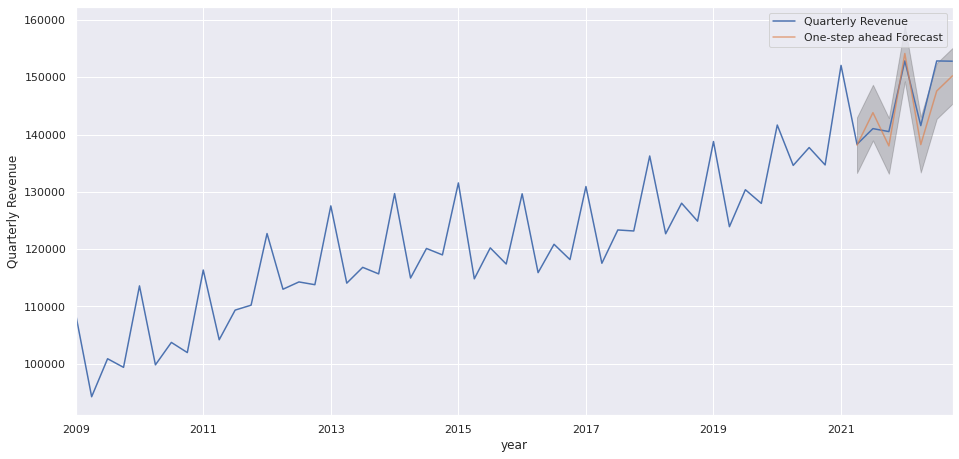

In [73]:
#Visualize the forecasting
ax = df['2009':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("year")
ax.set_ylabel('Quarterly Revenue')
plt.legend()
plt.show()

In [74]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)

from sklearn.metrics import mean_squared_error

y_hat = prediction.predicted_mean
y_truth = df['2021-04-30':]
mse = mean_squared_error(y_truth,y_hat)
rmse = np.sqrt(mse)

print('The Mean Squared Error of our forecasts is', mse)
print('The Root Mean Squared Error of our forecasts is', rmse)

The Mean Squared Error of our forecasts is 8648353.268553345
The Root Mean Squared Error of our forecasts is 2940.808267900739


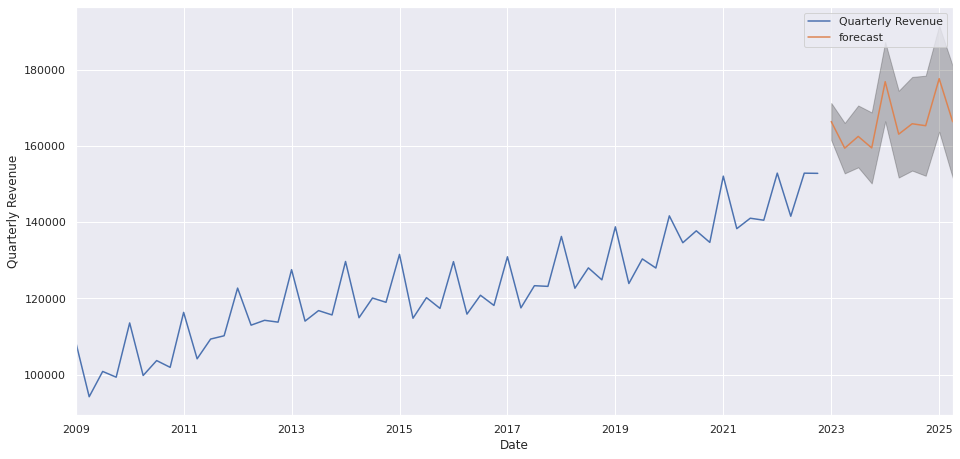

In [38]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 10)
pred_ci = pred_uc.conf_int()

ax = df.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Quarterly Revenue')

plt.legend()
plt.show()


## **DNN MODEL**

In [39]:
def convert2matrix(data_arr, look_back):
    X, Y =[], []
    for i in range(len(data_arr)-look_back):
        d=i+look_back  
        X.append(data_arr[i:d,0])
        Y.append(data_arr[d,0])
    return np.array(X).astype('int'), np.array(Y).astype('int')

In [43]:
df=pd.read_excel('Alibaba Quarterly Revenue.xlsx')

df = df.set_index('Date')


In [44]:
df1 = df
#Split data set into testing dataset and train dataset
train_size = 49
train, test =df1.values[0:train_size,:],df1.values[train_size:len(df1.values),:]
# setup look_back window 
look_back = 4
#convert dataset into right shape in order to input into the DNN
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

In [45]:
from keras.models import Sequential
from keras.layers import Dense
def model_dnn(look_back):
    model=Sequential()
    model.add(Dense(units=32, input_dim=look_back, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

In [46]:
model=model_dnn(look_back)
history=model.fit(trainX,trainY, epochs=500, batch_size=4, verbose=1, validation_data=(testX,testY),shuffle=False)

Epoch 1/500
12/12 [==============================] - 1s 15ms/step - loss: 6500924416.0000 - mse: 6500924416.0000 - mae: 80430.8203 - val_loss: 7176567296.0000 - val_mse: 7176567296.0000 - val_mae: 84625.9297
Epoch 2/500
12/12 [==============================] - 0s 3ms/step - loss: 3451995136.0000 - mse: 3451995136.0000 - mae: 58461.0117 - val_loss: 3339458816.0000 - val_mse: 3339458816.0000 - val_mae: 57673.1992
Epoch 3/500
12/12 [==============================] - 0s 3ms/step - loss: 1369991680.0000 - mse: 1369991680.0000 - mae: 36457.2852 - val_loss: 1036054336.0000 - val_mse: 1036054336.0000 - val_mae: 32019.2207
Epoch 4/500
12/12 [==============================] - 0s 3ms/step - loss: 326478656.0000 - mse: 326478656.0000 - mae: 16779.9941 - val_loss: 140287584.0000 - val_mse: 140287584.0000 - val_mae: 11434.0312
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 49302148.0000 - mse: 49302148.0000 - mae: 5308.9678 - val_loss: 9422529.0000 - val_mse: 9422529.0000 -

In [47]:
def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show();

In [48]:
train_score = model.evaluate(trainX, trainY, verbose=0)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(train_score[1]), train_score[2]))
test_score = model.evaluate(testX, testY, verbose=0)
print(train_score)
print(test_score)
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(test_score[1]), test_score[2]))

Train Root Mean Squared Error(RMSE): 2753.37; Train Mean Absolute Error(MAE) : 2053.85 
[7581066.5, 7581066.5, 2053.8525390625]
[46036500.0, 46036500.0, 5528.796875]
Test Root Mean Squared Error(RMSE): 6785.02; Test Mean Absolute Error(MAE) : 5528.80 


In [49]:
 def prediction_plot(testY, test_predict):
      len_prediction=[x for x in range(len(testY))]
      plt.figure(figsize=(8,4))
      plt.plot(len_prediction, testY[:8], marker='.', label="actual")
      plt.plot(len_prediction, test_predict[:8], 'r', label="prediction")
      plt.tight_layout()
      sns.despine(top=True)
      plt.subplots_adjust(left=0.07)
      plt.ylabel('Ads Daily Spend', size=15)
      plt.xlabel('Time step', size=15)
      plt.legend(fontsize=15)
      plt.show();

1/1 [==============================] - 0s 76ms/step


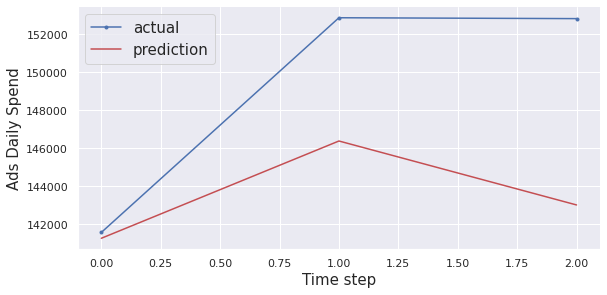

In [50]:
test_predict = model.predict(testX)
prediction_plot(testY, test_predict)

## **GRU and BiLSTM Models** 

In [51]:
df=pd.read_excel('Alibaba Quarterly Revenue.xlsx')
df.head()

,Date,Quarterly Revenue
0,2009-01-31,108627
1,2009-04-30,94242
2,2009-07-31,100876
3,2009-10-31,99373
4,2010-01-31,113594


In [52]:
df = df.set_index('Date')
df.head()

,Quarterly Revenue
Date,
2009-01-31,108627
2009-04-30,94242
2009-07-31,100876
2009-10-31,99373
2010-01-31,113594


In [53]:
# Split train data and test data
train_size = int(len(df)*0.8)

train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [54]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [55]:
# Create input dataset
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 4
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_test.shape)

X_train.shape:  (40, 4, 1)
y_train.shape:  (40, 1)
X_test.shape:  (8, 4, 1)
y_test.shape:  (8, 1)


In [56]:
# Create BiLSTM model
def create_bilstm(units):
    model = Sequential()
    # Input layer
    model.add(Bidirectional(
              LSTM(units = units, return_sequences=True), 
              input_shape=(X_train.shape[1], X_train.shape[2])))
    # Hidden layer
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model
model_bilstm = create_bilstm(64)
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model
model_gru = create_gru(64)

In [65]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
2/2 [==============================] - 0s 85ms/step - loss: 0.0187 - val_loss: 0.0225
Epoch 2/100
2/2 [==============================] - 0s 80ms/step - loss: 0.0165 - val_loss: 0.0200
Epoch 3/100
2/2 [==============================] - 0s 44ms/step - loss: 0.0177 - val_loss: 0.0188
Epoch 4/100
2/2 [==============================] - 0s 43ms/step - loss: 0.0198 - val_loss: 0.0185
Epoch 5/100
2/2 [==============================] - 0s 48ms/step - loss: 0.0195 - val_loss: 0.0187
Epoch 6/100
2/2 [==============================] - 0s 51ms/step - loss: 0.0193 - val_loss: 0.0197
Epoch 7/100
2/2 [==============================] - 0s 74ms/step - loss: 0.0240 - val_loss: 0.0214
Epoch 8/100
2/2 [==============================] - 0s 102ms/step - loss: 0.0214 - val_loss: 0.0237
Epoch 9/100
2/2 [==============================] - 0s 45ms/step - loss: 0.0226 - val_loss: 0.0256
Epoch 10/100
2/2 [==============================] - 0s 60ms/step - loss: 0.0199 - val_loss: 0.0265
Epoch 11/100
2/2 [

In [66]:
history_bilstm = fit_model(model_bilstm)

Epoch 1/100
2/2 [==============================] - 0s 84ms/step - loss: 0.0172 - val_loss: 0.0175
Epoch 2/100
2/2 [==============================] - 0s 37ms/step - loss: 0.0175 - val_loss: 0.0175
Epoch 3/100
2/2 [==============================] - 0s 37ms/step - loss: 0.0172 - val_loss: 0.0182
Epoch 4/100
2/2 [==============================] - 0s 38ms/step - loss: 0.0165 - val_loss: 0.0198
Epoch 5/100
2/2 [==============================] - 0s 33ms/step - loss: 0.0161 - val_loss: 0.0219
Epoch 6/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0160 - val_loss: 0.0240
Epoch 7/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0161 - val_loss: 0.0253
Epoch 8/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0161 - val_loss: 0.0254
Epoch 9/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0160 - val_loss: 0.0244
Epoch 10/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0157 - val_loss: 0.0228
Epoch 11/100
2/2 [=

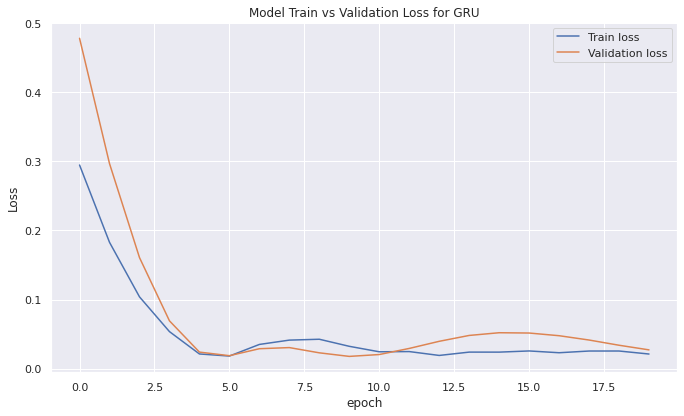

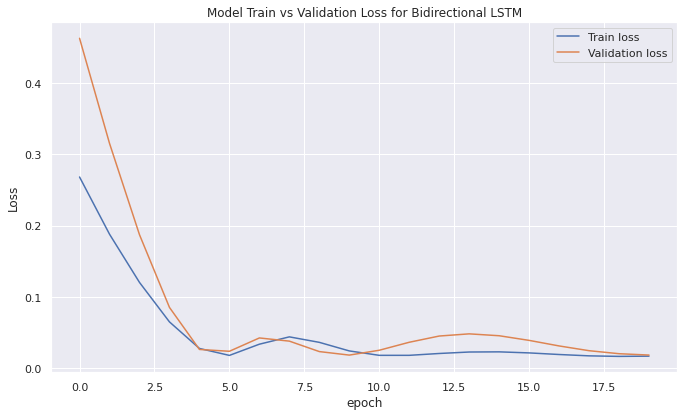

In [58]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')
plot_loss (history_bilstm, 'Bidirectional LSTM')

1/1 [==============================] - 0s 76ms/step


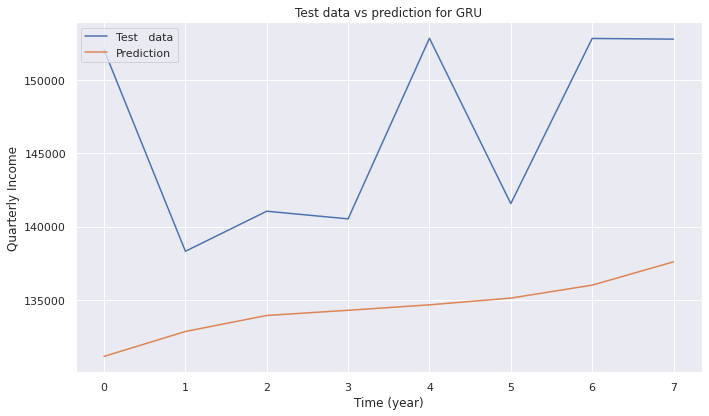

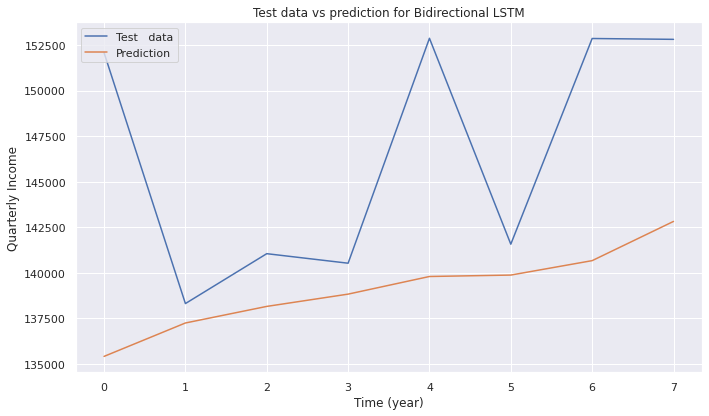

In [62]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(scaler.inverse_transform(y_test)), 
             label='Test   data')
    plt.plot(np.arange(range_future), 
             np.array(prediction),label='Prediction')
    plt.title('Test data vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Time (year)')
    plt.ylabel('Quarterly Income')
 
plot_future(prediction_gru, 'GRU', y_test)
plot_future(prediction_bilstm, 'Bidirectional LSTM', y_test)

In [69]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')
evaluate_prediction(prediction_gru, scaler.inverse_transform(y_test), 'GRU')
evaluate_prediction(prediction_bilstm, scaler.inverse_transform(y_test), 'Bidirectional LSTM')

GRU:
Mean Absolute Error: 12073.1387
Root Mean Square Error: 13458.3019

Bidirectional LSTM:
Mean Absolute Error: 7410.4375
Root Mean Square Error: 9438.1730



In [78]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')
evaluate_prediction(scaler.transform(prediction_gru), y_test, 'GRU')
evaluate_prediction(scaler.transform(prediction_bilstm), y_test, 'Bidirectional LSTM')

GRU:
Mean Absolute Error: 0.2710
Root Mean Square Error: 0.3021

Bidirectional LSTM:
Mean Absolute Error: 0.1663
Root Mean Square Error: 0.2119



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
